In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import re

#internet newsgroups such as politics dataset
from sklearn.datasets import fetch_20newsgroups
newsgroups_train = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))
newsgroups_test = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'))

In [2]:
newsgroups_test.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [3]:
newsgroups_test['data'][0]

'I am a little confused on all of the models of the 88-89 bonnevilles.\nI have heard of the LE SE LSE SSE SSEI. Could someone tell me the\ndifferences are far as features or performance. I am also curious to\nknow what the book value is for prefereably the 89 model. And how much\nless than book value can you usually get them for. In other words how\nmuch are they in demand this time of year. I have heard that the mid-spring\nearly summer is the best time to buy.'

In [4]:
#class numerical label
newsgroups_test['target'][0]

7

In [5]:
#forum type names
newsgroups_test['target_names'][7]

'rec.autos'

In [6]:
    df = pd.DataFrame([newsgroups_train.data, newsgroups_train.target.tolist()]).T
    df.columns = ['text', 'target']

    targets = pd.DataFrame( newsgroups_train.target_names)
    targets.columns=['title']

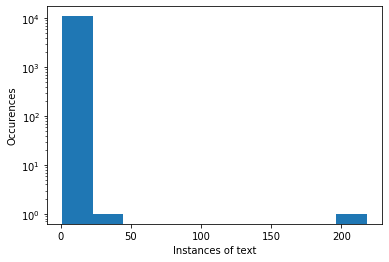

In [7]:
#times each text appears
counts = df.groupby(['text']).size()\
           .reset_index(name='counts')\
           .counts

#bins for histogram
my_bins = 10

#histogram of text
plt.figure()
plt.hist(counts, bins = my_bins)
plt.xlabels = np.arange(1,counts.max()+1, 1)
plt.xlabel('Instances of text')
plt.ylabel('Occurences')
plt.yscale('log', nonposy='clip')
plt.show()

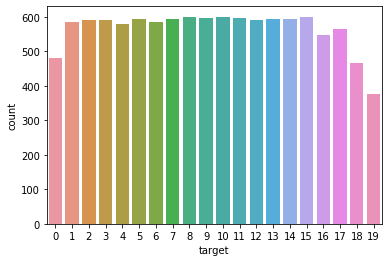

In [8]:
#count of the number of articles in each group
sns.countplot(x = 'target', data = df)

In [9]:
#Vectorize and split the data
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

vectorizer = TfidfVectorizer()

train_docs = newsgroups_train['data']

X_features, train_docs_sample, X_labels, test_labels_sample = train_test_split(
    train_docs, newsgroups_train["target"], test_size=0.05, random_state=42)

test_docs = newsgroups_test['data']
train_feats = vectorizer.fit_transform(train_docs_sample)
#test_feats = vectorizer.transform(test_docs)

In [10]:
np.array(train_feats.todense()[0,:])

array([[0., 0., 0., ..., 0., 0., 0.]])

In [11]:
train_feats.todense().shape

(566, 13513)

In [12]:
#Import Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB

In [13]:
#Multinomial Naive Bayes model
model = MultinomialNB()
model.fit(train_feats, test_labels_sample)
predict = model.predict(train_feats)

In [14]:
#accuracy of Multinomial Naive Bayes
NBscore = model.score(train_feats, test_labels_sample)
NBscore

0.9240282685512368

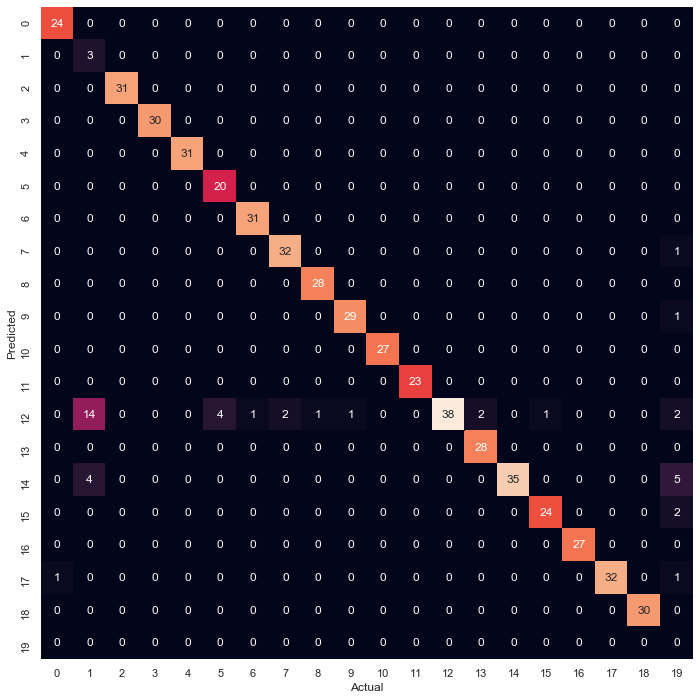

In [15]:
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import make_pipeline
import seaborn as sns; sns.set()

#confusion matrix
mat = confusion_matrix(test_labels_sample, predict)

#setting plot size
fig, ax = plt.subplots(figsize=(12,12))

#confusion matrix as a heat map for each category, if the names were not removed this would be more clear
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,)
plt.xlabel('Actual')
plt.ylabel('Predicted');
plt.show()

In [16]:
from sklearn.svm import LinearSVC
#Linear SVC model
model = LinearSVC()
X_features, train_docs_sample, X_labels, test_labels_sample = train_test_split(
    train_docs, newsgroups_train["target"], test_size=0.05, random_state=42)
model.fit(train_feats, test_labels_sample)
predict = model.predict(train_feats)
SVCscore = model.score(train_feats, test_labels_sample)
SVCscore

0.9876325088339223

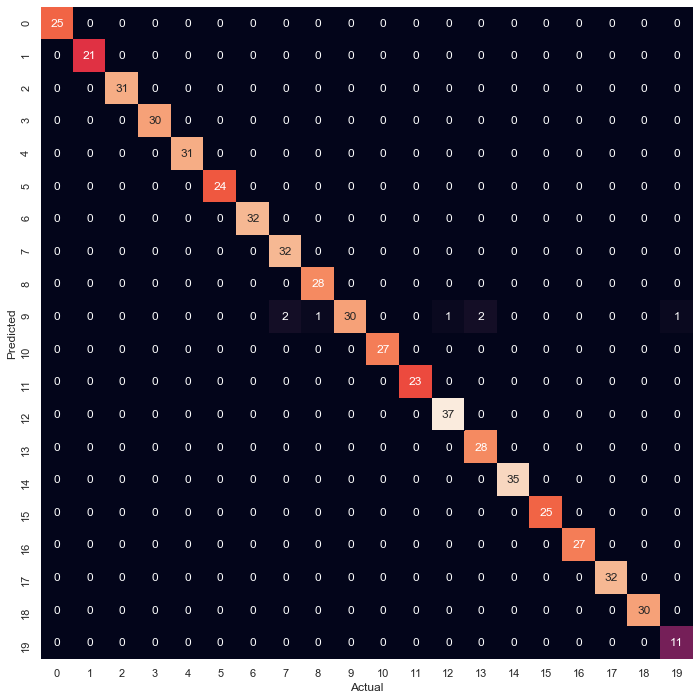

In [17]:
#confusion matrix
mat = confusion_matrix(test_labels_sample, predict)

#setting plot size
fig, ax = plt.subplots(figsize=(12,12))

#confusion matrix as a heat map for each category, if the names were not removed this would be more clear
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,)
plt.xlabel('Actual')
plt.ylabel('Predicted');

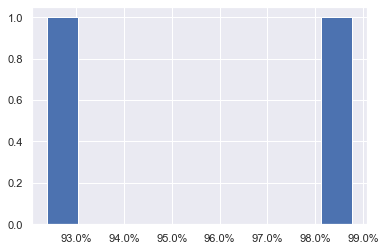

In [20]:
#histogram percent on axis
from matplotlib.ticker import PercentFormatter
#comparison of the two scores
comparison = [NBscore, SVCscore]
plt.hist(comparison, weights=np.ones(len(comparison)))
plt.gca().xaxis.set_major_formatter(PercentFormatter(1))
plt.show()

The Multinomial Naive Bayes classification has an accuracy of 92.4%. Linear SVC is able to achieve an accuracy of 98.7%. This accuracy comparison can be seen in each models confusion matrix. Predicted 12/Actual 1 plot for Naive BAyes shows 14 errors for that category while the second SVC plot shows no errors. 